Importujemy potrzebne biblioteki

In [37]:
from qiskit import BasicAer, execute
from gates.su4gates import *
from util.util import *
import matplotlib.pyplot as plt
import numpy as np

Definiujemy potrzebne zmienne

In [38]:
qubits = 12
number_of_possibilities = 4096
shots = 65000
number_of_bins = 1000

Tworzymy własny obwód SU(4) oraz nadajemy mu nazwę

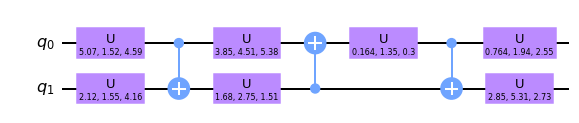

In [39]:
quantum_circuit = su_4()
su_4_gate = quantum_circuit.to_gate(label="SU(4)")
quantum_circuit.draw(output='mpl')

Tworzymy nowy obwód kwantowy składający się ze wcześniej przygotowanego obwodu SU(4)
oraz przeprowadzamy pomiary

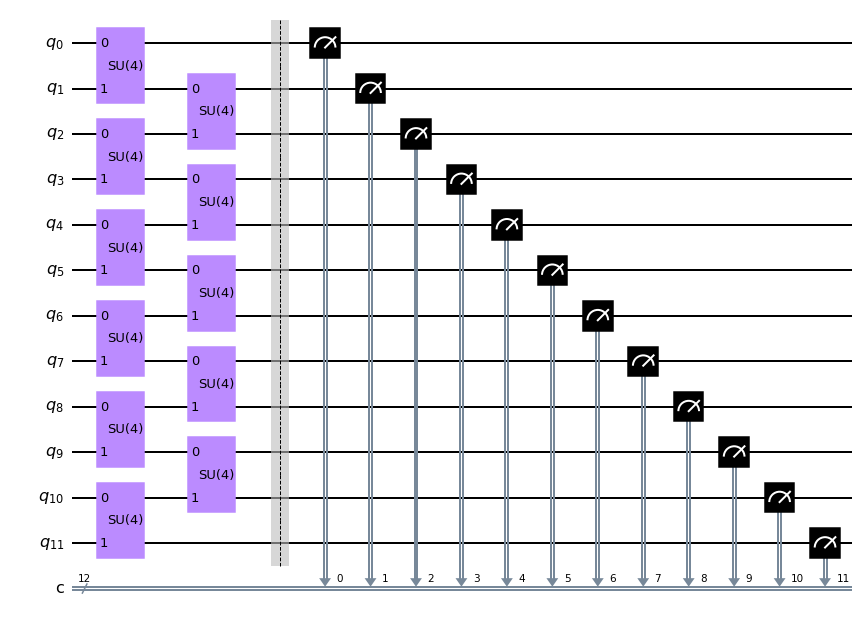

In [40]:
su_4_cirquit = QuantumCircuit(12, 12)
su_4_cirquit.append(su_4_gate, [0, 1])
su_4_cirquit.append(su_4_gate, [2, 3])
su_4_cirquit.append(su_4_gate, [4, 5])
su_4_cirquit.append(su_4_gate, [6, 7])
su_4_cirquit.append(su_4_gate, [8, 9])
su_4_cirquit.append(su_4_gate, [10, 11])
su_4_cirquit.append(su_4_gate, [1, 2])
su_4_cirquit.append(su_4_gate, [3, 4])
su_4_cirquit.append(su_4_gate, [5, 6])
su_4_cirquit.append(su_4_gate, [7, 8])
su_4_cirquit.append(su_4_gate, [9, 10])
su_4_cirquit.barrier()
su_4_cirquit.measure([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
su_4_cirquit.draw(output='mpl')

Układ zostaje uruchomiony określoną liczbę razy. Następnie zliczane są wyniki każdego wykonania oraz obliczane jest prawdopodobieństwo każdego wyniku

In [41]:
backend = BasicAer.get_backend('qasm_simulator')
result = execute(su_4_cirquit, backend, shots=shots).result()
counts = result.get_counts()
counts = create_counts_all(counts, qubits)
probabilities_of_results = probabilities(counts, shots)
probabilities_of_results_values = list(probabilities_of_results.values())

Tworzymy histogram

Ilość wszystkich wygenerowanych kombinacji w 8-bitowym ciągu:  4096


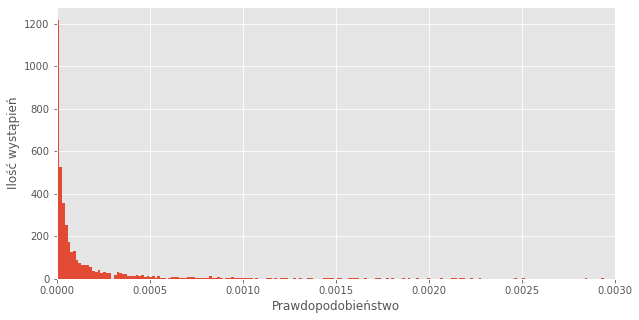

In [42]:
print("Ilość wszystkich wygenerowanych kombinacji w 8-bitowym ciągu: ", len(probabilities_of_results))

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.hist(probabilities_of_results_values, bins=number_of_bins)
plt.xlim(0, 0.003)
plt.xlabel("Prawdopodobieństwo")
plt.ylabel("Ilość wystąpień")
plt.show()

Naniesienie na znormalizowany histogram teoretycznego rozkładu Portera-Thomasa oraz obliczenie entropii minimalnej i chi-kwadrat

Chi-kwadrat:  93697.58153478918
Entropia minimalna: 4.224628486332384


Text(0, 0.5, 'Gęstość prawdopodobieństwa')

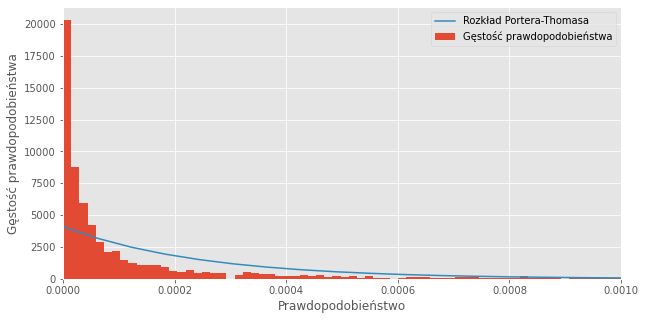

In [43]:
plt.figure(figsize=(10, 5))
probability_counter, bins, bar_in_histogram = plt.hist(probabilities_of_results_values, bins=number_of_bins)
bin_width = bins[1] - bins[0]
bin_heights = []

for item in bar_in_histogram:
    item.set_height(item.get_height() / (len(probabilities_of_results)) / bin_width)
    bin_heights.append(item.get_height())

middle_bins = middle_of_bins(bins)

chi = []
for i in range(0, 100):
    chi.append((bar_in_histogram[i].get_height() - porter_thomas_distribution(middle_bins[i],
                                                                              number_of_possibilities)) ** 2 / porter_thomas_distribution(
        middle_bins[i], number_of_possibilities))

print("Chi-kwadrat: ", sum(chi))
print("Entropia minimalna:", min_entropy(probabilities_of_results_values))

y = [number_of_possibilities * math.exp(-number_of_possibilities * p) for p in
     np.linspace(0, 1, len(probabilities_of_results_values) * 4)]
x = np.linspace(0, 1, len(y))
plt.xlim(0, 0.001)
plt.ylim(0, max(bin_heights) + (max(bin_heights) * 0.05))
plt.plot(x, y)
plt.legend(["Rozkład Portera-Thomasa", "Gęstość prawdopodobieństwa"])
plt.xlabel("Prawdopodobieństwo")
plt.ylabel("Gęstość prawdopodobieństwa")

Histogram z naniesionym zlogarytmowanym rozkładem Portera-Thomasa

Text(0, 0.5, 'Gęstość prawdopodobieństwa')

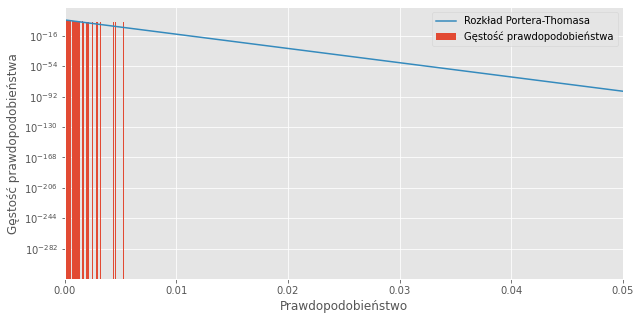

In [44]:
plt.figure(figsize=(10, 5))
probability_counter, bins, bar_in_histogram = plt.hist(probabilities_of_results_values, bins=number_of_bins)
bin_width = bins[1] - bins[0]
for item in bar_in_histogram:
    item.set_height(item.get_height() / (len(probabilities_of_results)) / bin_width)

y = [number_of_possibilities * math.exp(-number_of_possibilities * p) for p in np.linspace(0, 1, len(probabilities_of_results_values) * 100)]
x = np.linspace(0, 1, len(y))
plt.yscale('log')
plt.xlim(0, 0.05)
plt.plot(x, y)
plt.legend(["Rozkład Portera-Thomasa", "Gęstość prawdopodobieństwa"])
plt.xlabel("Prawdopodobieństwo")
plt.ylabel("Gęstość prawdopodobieństwa")

Histogram z naniesionym zlogarytmowanym rozkładem Portera-Thomasa oraz rozkładem Beta

Text(0, 0.5, 'Gęstość prawdopodobieństwa')

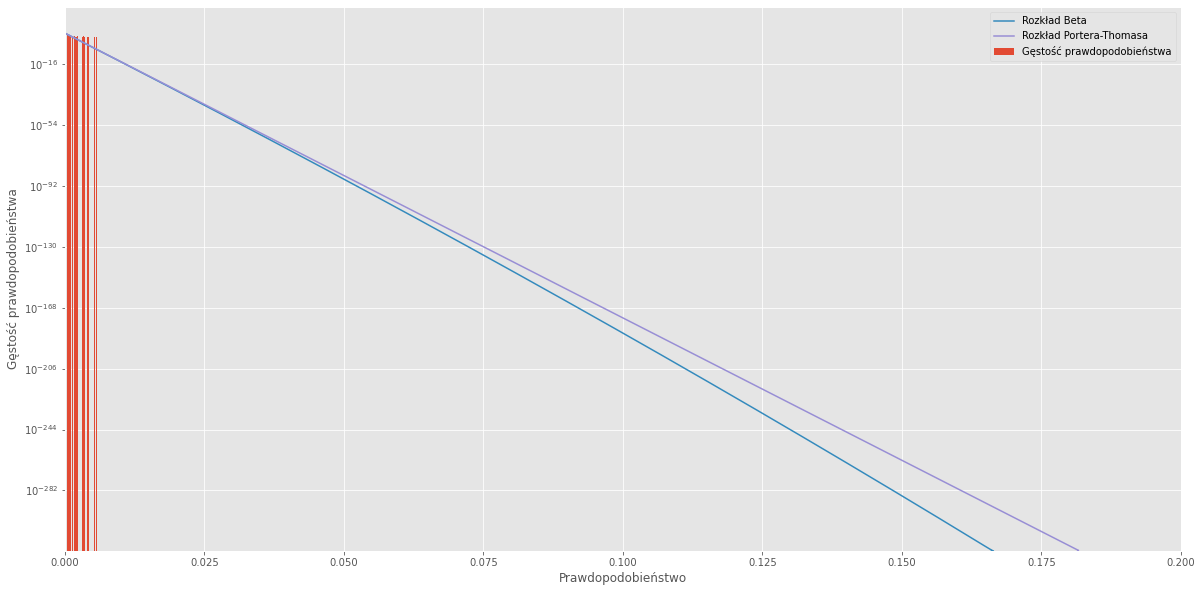

In [45]:
plt.figure(figsize=(20, 10))
probability_counter, bins, bar_in_histogram = plt.hist(probabilities_of_results_values, bins=number_of_bins)
bin_width = bins[1] - bins[0]
for item in bar_in_histogram:
    item.set_height(item.get_height() / (len(probabilities_of_results)) / bin_width)

beta = [(number_of_possibilities - 1) * math.pow((1 - p), (number_of_possibilities - 2)) for p in np.linspace(0, 1, len(probabilities_of_results_values) * 100)]
pt = [number_of_possibilities * math.exp(-number_of_possibilities * p) for p in np.linspace(0, 1, len(probabilities_of_results_values) * 100)]

x = np.linspace(0, 1, len(y))
plt.yscale('log')
plt.xlim(0, 0.2)
plt.plot(x, beta)
plt.plot(x, pt)
plt.legend(["Rozkład Beta", "Rozkład Portera-Thomasa", "Gęstość prawdopodobieństwa"])
plt.xlabel("Prawdopodobieństwo")
plt.ylabel("Gęstość prawdopodobieństwa")